In [1]:
# Standard imports
import sys
from pathlib import Path
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

In [5]:
import sys
from pathlib import Path

# Detect the real project root explicitly
root = Path().resolve().parents[0]

# If running notebooks/01_... then root should be "aml-mule-risk-scoring"
while root.name != "aml-mule-risk-scoring":
    root = root.parent

src_path = root / "src"
sys.path.append(str(src_path))

print("Project root:", root)
print("SRC Path added:", src_path)

Project root: /Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring
SRC Path added: /Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src


In [12]:
import importlib
import data_generation
importlib.reload(data_generation)

<module 'data_generation' from '/Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src/data_generation.py'>

In [7]:
# Generate synthetic dataset (currently with placeholder logic)
accounts_df, transactions_df = generate_full_dataset()

accounts_df.head(), transactions_df.head()

=== FAN-IN DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule collector sample: [1915, 1962, 3456, 2437, 3724]

Pattern 1: dst=1915, senders_count=43
  TX: [None, np.int64(6), 1156, 1915, 2680.65]
  TX: [None, np.int64(89), 1372, 1915, 4255.66]
  TX: [None, np.int64(35), 4159, 1915, 2811.48]
  TX: [None, np.int64(67), 2843, 1915, 4707.8]

Pattern 2: dst=1962, senders_count=15

Pattern 3: dst=3456, senders_count=17

Pattern 4: dst=2437, senders_count=14

Pattern 5: dst=3724, senders_count=40

Pattern 6: dst=954, senders_count=18

Pattern 7: dst=3977, senders_count=27

Pattern 8: dst=2198, senders_count=14

Pattern 9: dst=4958, senders_count=36

Pattern 10: dst=3708, senders_count=34

Pattern 11: dst=2824, senders_count=25

Pattern 12: dst=3380, senders_count=34

Pattern 13: dst=4517, senders_count=19

Pattern 14: dst=2019, senders_count=41

Pattern 15: dst=2757, senders_count=11

Pattern 16: dst=4263, senders_count=38

Pattern 17: dst=3490, senders_count=48

Patte

/Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src/data_generation.py:215: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transactions = pd.concat(


(   account_id  is_mule typology_type  account_open_day
 0           0        0        normal                 0
 1           1        0        normal                10
 2           2        0        normal                24
 3           3        0        normal                 0
 4           4        0        normal                26,
    txn_id timestamp_day src_account_id dst_account_id   amount
 0       0             6           1156           1915  2680.65
 1       1            89           1372           1915  4255.66
 2       2            35           4159           1915  2811.48
 3       3            67           2843           1915  4707.80
 4       4            18           1521           1915  3261.86)

In [22]:
print("Accounts shape:", accounts_df.shape)
print("Transactions shape:", transactions_df.shape)

print("\nMule distribution:")
print(accounts_df['is_mule'].value_counts())

Accounts shape: (5000, 4)
Transactions shape: (0, 5)

Mule distribution:
is_mule
0    4850
1     150
Name: count, dtype: int64


In [23]:
print("Typology types:")
print(accounts_df['typology_type'].value_counts())

Typology types:
typology_type
normal    5000
Name: count, dtype: int64


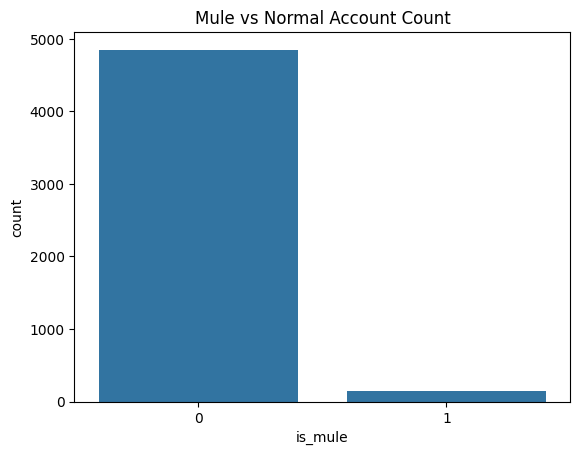

In [17]:
sns.countplot(data=accounts_df, x="is_mule")
plt.title("Mule vs Normal Account Count")
plt.show()

In [22]:
fan_in_txn = generate_transactions_fan_in(accounts_df)
fan_in_txn.shape

=== FAN-IN DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule collector sample: [4045, 1118, 2661, 1601, 3948]

Pattern 1: dst=4045, senders_count=13
  TX: [None, np.int64(69), 4266, 4045, 2755.51]
  TX: [None, np.int64(38), 2854, 4045, 3789.47]
  TX: [None, np.int64(77), 158, 4045, 1376.71]
  TX: [None, np.int64(47), 91, 4045, 4044.56]

Pattern 2: dst=1118, senders_count=16

Pattern 3: dst=2661, senders_count=22

Pattern 4: dst=1601, senders_count=15

Pattern 5: dst=3948, senders_count=29

Pattern 6: dst=932, senders_count=42

Pattern 7: dst=1219, senders_count=37

Pattern 8: dst=2163, senders_count=15

Pattern 9: dst=4517, senders_count=11

Pattern 10: dst=2019, senders_count=30

Pattern 11: dst=691, senders_count=30

Pattern 12: dst=3814, senders_count=10

Pattern 13: dst=1801, senders_count=15

Pattern 14: dst=4337, senders_count=27

Pattern 15: dst=1821, senders_count=13

Pattern 16: dst=694, senders_count=23

Pattern 17: dst=569, senders_count=40

Pattern 1

(807, 5)

In [26]:
print("Mules:", accounts_df[accounts_df["is_mule"] == 1].shape[0])
print("Normals:", accounts_df[accounts_df["is_mule"] == 0].shape[0])

Mules: 150
Normals: 4850


In [27]:
from data_generation import RNG, SIM_DAYS

print("Sample senders test:", RNG.integers(10, 50))

Sample senders test: 43


In [28]:
print("SIM_DAYS:", SIM_DAYS)

SIM_DAYS: 90


In [29]:
mule_accounts = accounts_df[accounts_df["is_mule"] == 1]["account_id"].sample(30, replace=True)
mule_accounts.head()

2285    2285
3308    3308
846      846
2686    2686
4216    4216
Name: account_id, dtype: int64

In [18]:
import data_generation
print(data_generation.__file__)

/Users/vimu/Documents/Data Science/00 Thesis/Github/aml-mule-risk-scoring/src/data_generation.py


In [10]:
fan_in_txn = generate_transactions_fan_in(accounts_df)
fan_in_txn.shape

=== FAN-IN DEBUG START ===
Total mule accounts: 150
Total normal accounts: 4850
Mule collector sample: [1426, 1169, 3427, 4981, 1735]

Pattern 1: dst=1426, senders_count=34
  TX: [None, np.int64(87), 4989, 1426, 1840.02]
  TX: [None, np.int64(5), 145, 1426, 1617.68]
  TX: [None, np.int64(9), 598, 1426, 4705.13]
  TX: [None, np.int64(11), 1383, 1426, 1055.39]

Pattern 2: dst=1169, senders_count=21

Pattern 3: dst=3427, senders_count=42

Pattern 4: dst=4981, senders_count=39

Pattern 5: dst=1735, senders_count=29

Pattern 6: dst=889, senders_count=26

Pattern 7: dst=2824, senders_count=43

Pattern 8: dst=1733, senders_count=15

Pattern 9: dst=3577, senders_count=37

Pattern 10: dst=4981, senders_count=31

Pattern 11: dst=3490, senders_count=44

Pattern 12: dst=3658, senders_count=24

Pattern 13: dst=394, senders_count=27

Pattern 14: dst=449, senders_count=11

Pattern 15: dst=1118, senders_count=37

Pattern 16: dst=2559, senders_count=22

Pattern 17: dst=2185, senders_count=39

Pattern 1

(927, 5)

In [23]:
from data_generation import generate_transactions_fan_out

fan_out_txn = generate_transactions_fan_out(accounts_df)
print(fan_out_txn.shape)
print(fan_out_txn["typology_type"].value_counts())

(0, 5)


KeyError: 'typology_type'

In [24]:
fan_out_txn = generate_transactions_fan_out(accounts_df)
print(fan_out_txn.shape)
print(fan_out_txn["typology_type"].value_counts())

(0, 5)


KeyError: 'typology_type'